# MODUL 7 : Morfologi Citra

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

Code di atas digunakan untuk

memanggil library cv2 dengan nama alias cv. Library ini digunakan untuk melakukan operasi dasar matriks 

memanggil fungsi pyplot library matplotlib dengan nama alias plt. Library ini digunakan untuk membaca gambar

memanggil library numpy dengan nama alias np. Library ini digunakan untuk membuat matriks

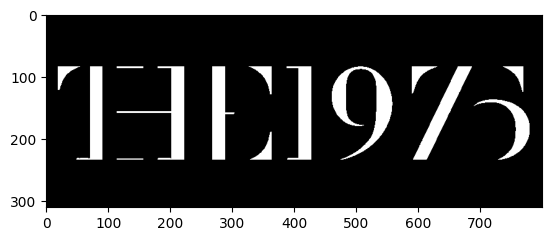

In [2]:
image = plt.imread("1975.jpg")
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
nothing, THR = cv.threshold(gray_image,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(THR,cmap='gray')

code di atas digunakan untuk menampilkan citra pada variabel image. Namun sebelum menampilkan dengan fungsi imshow() perlu adanya variabel berisi nilai dengan fungsi threshold untuk mengubah citra menjadi citra biner. hal ini dilakukan karena untuk melakukan proses morfologi citra dibutuhkan citra biner.

In [3]:
kernel = np.array([[ 1, 1, 1, 1, 1],
                   [ 1, 1, 1, 1, 1],
                   [ 1, 1, 1, 1, 1],
                   [ 1, 1, 1, 1, 1],
                   [ 1, 1, 1, 1, 1]], dtype=np.uint8)

code di atas digunakan untuk membuat kernel 5x5 yang berisi nilai satu sebagau struktur element dalam morfologi citra.

Lakukanlah proses morfologi citra pada gambar tersebut (erosi, dilasi, opening, dan
closing) dengan kernel berukuran 5 x 5 (semua nilai di dalamnya adalah 1)!

In [4]:
def dilasi(img,SE):
    n = int((len(SE)-1)/2) #variabel bantuan untuk meletakkan pusat pada tengah kernel pada saat memasukkan nilai pada citra kosong
    result = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == 255:
                for k in range(SE.shape[0]):
                    for l in range(SE.shape[1]):
                        if SE[k,l] == 1:
                            result[i+k-n,j+l-n] = 255
            else:
                if result[i,j] != 255: #perlu pengecekan ulang untuk memastikan kembali apakah pixel adalah 0 atau tidak agar tidak terjadi kesalahan
                    result[i,j] = 0 
    return result

Code di atas merupakan fungsi dilasi yang digunakan untuk melakukan proses morfologi citra dengan melakukan dilasi pada citra. sebelum melakukan proses dilasi perlu adanya variabel result untuk menyimpan hasil dari proses dilasi. terdapat 2 nested for yang pertama untuk mengunjungi setiap pixel dari citra asli sedangkan nested for kedua digunakan untuk mengunjungi setiap pixel pada kernel yang telah ditentukan. untuk menjalankan nested for kedua diperlukan kondisi dimana img[i,j] = 255 atau putih. dan di dalam nested for kedua akan dijalankan result[i+k-n,j+l-n] = 255 yang akan diisi ke dalam citra baru yaitu result. di dalam nested for pertama terdapa kondisi else jika piksel yang dikunjungi bernilai 0 maka piksel pada citra baru dengan posisi yang sama akan diisi dengan 0;

In [5]:
def erosi(img,SE):
    n = int((len(SE)-1)/2) #variabel bantuan untuk meletakkan pusat pada tengah kernel pada saat memasukkan nilai pada citra kosong
    result = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            check = 0
            if img[i,j] == 255:
                for k in range(SE.shape[0]):
                    for l in range(SE.shape[1]):
                        if img[i+k-n,j+l-n] == 0:
                            # if kernel[k,l] == 255: #Optional
                                result[i,j] = 0
                        else:
                            check +=1
            if check == (SE.shape[0]*SE.shape[1]):
                result[i,j] = 255
    return result

Code di atas merupakan fungsi erosi yang digunakan untuk melakukan proses morfologi citra dengan melakukan erosi pada citra. sebelum melakukan proses dilasi perlu adanya variabel result untuk menyimpan hasil dari proses dilasi. terdapat 2 nested for yang pertama untuk mengunjungi setiap pixel dari citra asli sedangkan nested for kedua digunakan untuk mengunjungi setiap pixel pada kernel yang telah ditentukan. untuk menjalankan nested for kedua diperlukan kondisi dimana img[i,j] = 255 atau putih. dan di dalam nested for kedua akan dijalankan result[i+k-n,j+l-n] = 0 yang akan diisi ke dalam citra baru yaitu result jika kondisi img[i+k-n,j+l-n] == 0 terpenuhi dan jika tidak nilai variabel check akan bertambah 1. di dalam nested for pertama terdapa kondisi else jika check == (SE.shape[0]*SE.shape[1]) maka piksel pada citra baru dengan posisi yang sama akan diisi dengan 255;

In [6]:
def opening(img,kernel):
    result = erosi(img,kernel)
    result = dilasi(result,kernel)

    return result

code di atas merupakan fungsi opening dimana paramter img dan kernel akan dimasukkan ke dalam variabel result dengan memanggil fungsi erosi dan hasilnya akan langsung melakukan proses dilasi

In [7]:
def closing(img,kernel):
    result = dilasi(img,kernel)
    result = erosi(result,kernel)

    return result

code di atas merupakan fungsi closing dimana paramter img dan kernel akan dimasukkan ke dalam variabel result dengan memanggil fungsi dilasi dan hasilnya akan langsung melakukan proses erosi

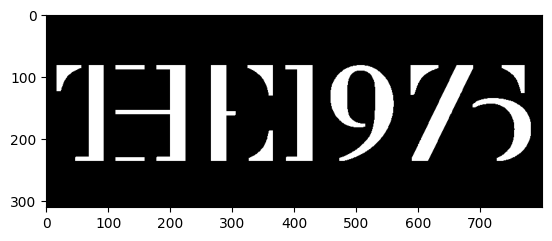

In [8]:
dilasi_result = dilasi(THR,kernel)
plt.imshow(dilasi_result, cmap='gray')

Code di atas digunakan untuk menampilkan citra pada variabel dilasi_result yang diisi dengan nilai dilasi(THR,kernel) menggunakan fungsi imshow()

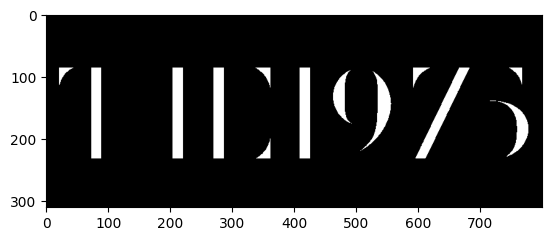

In [9]:
erosi_result = erosi(THR,kernel)
plt.imshow(erosi_result, cmap='gray')

Code di atas digunakan untuk menampilkan citra pada variabel erosi_result yang diisi dengan nilai erosi(THR,kernel) menggunakan fungsi imshow()

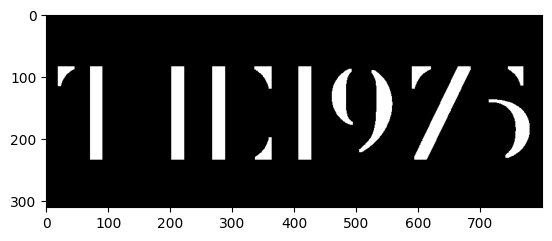

In [10]:
open_result = opening(THR,kernel)
plt.imshow(open_result, cmap='gray')

Code di atas digunakan untuk menampilkan citra pada variabel opening_result yang diisi dengan nilai opening(THR,kernel) menggunakan fungsi imshow()

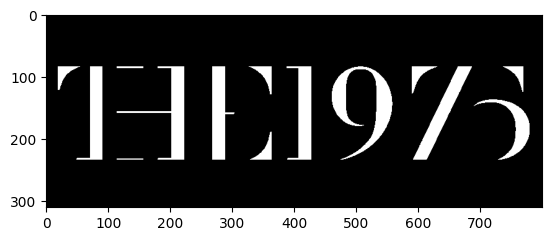

In [11]:
close_result = closing(THR,kernel)
plt.imshow(close_result, cmap='gray')

Code di atas digunakan untuk menampilkan citra pada variabel closing_result yang diisi dengan nilai closing(THR,kernel) menggunakan fungsi imshow()

SOAL TAMBAHAN (OPSIONAL)
lakukanlah proses morfologi citra jenis gradien morfologi pada citra dengan kernel yang sama

In [12]:
def gradient_morph(dilasi, erosi):
    dilasi = dilasi - 255
    result = np.zeros(dilasi.shape)
    for i in range(dilasi.shape[0]):
        for j in range(dilasi.shape[1]): 
            if dilasi[i,j]  == erosi[i,j]:
                result[i,j] =255

    return result

code di atas merupakan fungsi gradient_morph yang digunakan untuk melakukan gradient morfologi. pada fungsi tersebutr terdapat 2 parameter yaitu citra hasi dilasi dan citra hasil erosi. pertama-tama dilakukan proses negatif ke citra dilasi lalu membuat variabel result yang akan diisi dengan nilai dari citra gradient morfologi. terdapat nested for untuk mengunjungi setiap piksel yang ada pada citra. di dalam nested for terdapat kondisi dilasi[i,j]  == erosi[i,j] dimana jika terpenuhi maka niali result[i,j] =255 atau putih

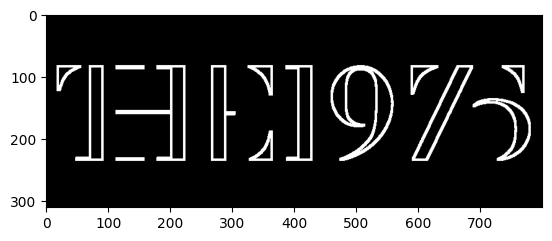

In [13]:
gradient_img = gradient_morph(dilasi_result, erosi_result)
plt.imshow(gradient_img, cmap='gray')

Code di atas digunakan untuk menampilkan citra pada variabel gradient_img yang diisi dengan nilai gradient_morph(dilasi_result,erosi_result) menggunakan fungsi imshow()